In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf

%matplotlib inline

In [2]:
#readin csv file into dataframe
df = pd.read_csv('911.csv')

In [3]:
#checking the info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
#checking head of df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Basic Questions

In [5]:
#What are the top 5 zip code for 911 calls?
df['zip'].value_counts().head()

#The most common zipcode of a 911 call is 19401, almost 7000 911 calls have come from this zip code

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [9]:
df[df['zip'] == 19401.0]['title'].value_counts()
#The zip code 19401 is most common for vehicle accidents

Traffic: VEHICLE ACCIDENT -    1218
EMS: RESPIRATORY EMERGENCY      562
EMS: CARDIAC EMERGENCY          432
EMS: FALL VICTIM                368
EMS: SUBJECT IN PAIN            362
                               ... 
Fire: RESCUE - WATER              1
Fire: RESCUE - TECHNICAL          1
EMS: RESCUE - ELEVATOR            1
Fire: UNCONSCIOUS SUBJECT         1
EMS: FIRE INVESTIGATION           1
Name: title, Length: 81, dtype: int64

In [10]:
# What is the most common town for 911 calls?
df['twp'].value_counts().head()

#Lower Merion is the most common town for 911 calls

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [12]:
df[df['twp'] == 'LOWER MERION']['title'].value_counts()

#There have been 2324 car accidents in Lower Merion

Traffic: VEHICLE ACCIDENT -    2324
Traffic: DISABLED VEHICLE -     787
Fire: FIRE ALARM                772
Traffic: ROAD OBSTRUCTION -     406
EMS: VEHICLE ACCIDENT           350
                               ... 
Fire: TRAIN CRASH                 1
EMS: FIRE SPECIAL SERVICE         1
Fire: TRANSFERRED CALL            1
EMS: BURN VICTIM                  1
EMS: TRAIN CRASH                  1
Name: title, Length: 78, dtype: int64

In [13]:
df['title'].nunique()

#There are 110 different title codes

110

#### Creating new Features 

In the titles column there are "Reasons" specified before title codes. Theses are EMS, Fire, Traffic. I will use a custom lambda expression to create a new column containing this code. Example: EMS: BACK PAINS/INJURY

In [14]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [15]:
# What is the most common reason for a 911 Call
df['Reason'].value_counts().head(5)

# There are almost 50000 EMS's calls

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Text(0.5, 1.0, '911 Calls by Reason')

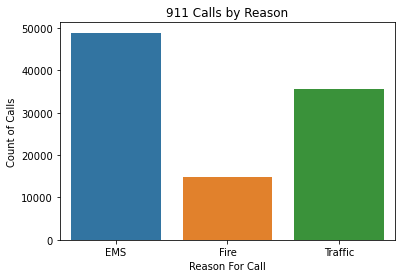

In [16]:
#Creating a countplot of 911 calls by reason

sns.countplot(x = "Reason", data = df)
plt.xlabel('Reason For Call')
plt.ylabel('Count of Calls')
plt.title('911 Calls by Reason')

### Analysing Time of 911 Calls

In [17]:
type(df['timeStamp'].iloc[1])

str

In [18]:
# Converting the timeStamp from strings to DateTime objects
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [19]:
#Now that the timeStamp columns has been converted to DateTime objects, I will
#create 3 new columns called Hour, Month, and Day of Week

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [20]:
#Using .map() to map actual string names to the day of the week

dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

Text(0.5, 1.0, 'Number of Calls on Each Day of The Week')

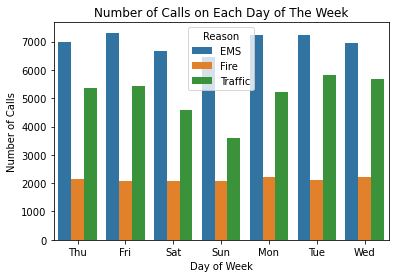

In [22]:
#Creating a countplot of number of calls each day of the week and what the
#cause was

sns.countplot(x = 'Day of Week', data = df, hue = 'Reason')
plt.xlabel('Day of Week')
plt.ylabel('Number of Calls')
plt.title('Number of Calls on Each Day of The Week')

Text(0.5, 1.0, 'Number of Calls Each Month')

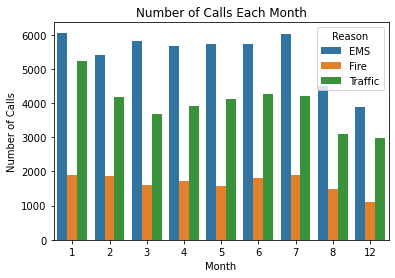

In [23]:
#Creating a countplot of of number of calls each month and what the cause was

sns.countplot(x = 'Month', data = df, hue = 'Reason')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('Number of Calls Each Month')

The graph above is missing some months due to faulty data. In order to fix this problem, I will use the groupby() method to aggregate the months

In [24]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed


In [26]:
byMonth = df.groupby(by = 'Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

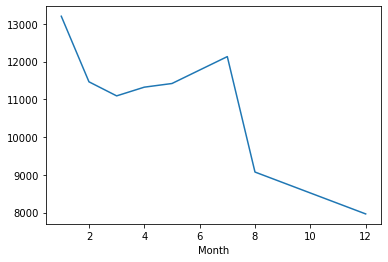

In [27]:
#Creating a simple line plot to indicate the count of calls per month

byMonth['twp'].plot()

I am creating a new column called 'Date' that will contain the data from the timeStamp column

In [34]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.



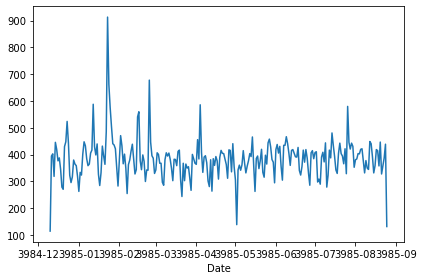

In [35]:
#Creating a countplot of 911 calls

df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.



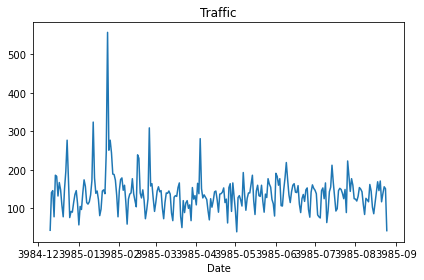

In [36]:
#Creating a plot overtime representing the number of calls representing a
#specific reason

df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.



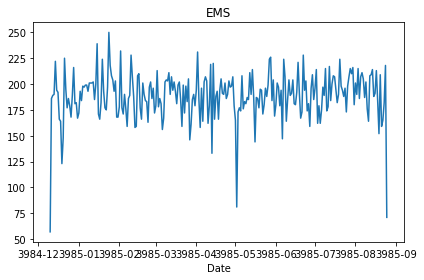

In [37]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.



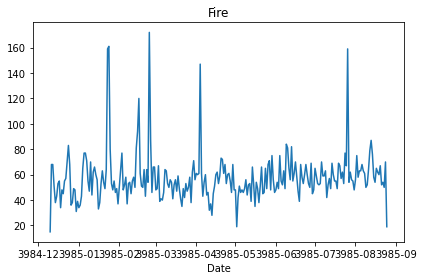

In [38]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

Now I will create heatmaps with seaborn to further look for correlations between different features 

In [39]:
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

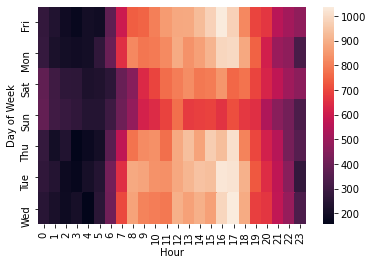

In [40]:
#Creating a heatmap

sns.heatmap(dayHour)

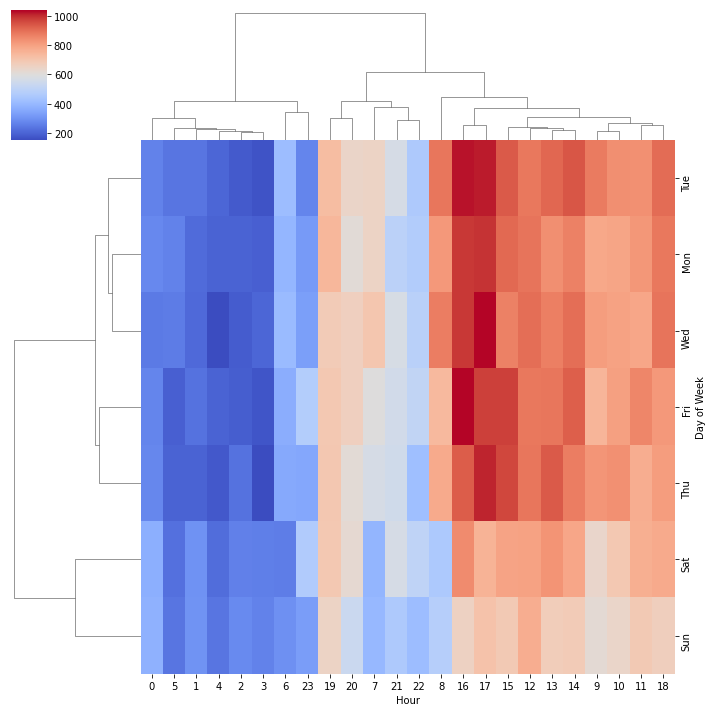

In [41]:
#Creating a clustermap

sns.clustermap(dayHour, cmap = 'coolwarm')

In [42]:
#now i will do the same thing for the month columns

dayMonth = df.groupby(by = ['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

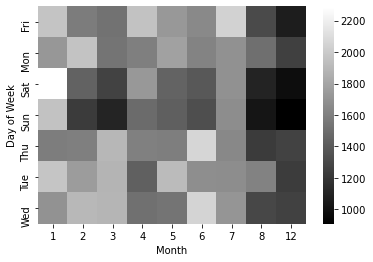

In [44]:
#Creating the heatmap

sns.heatmap(dayMonth, cmap = 'gist_gray')

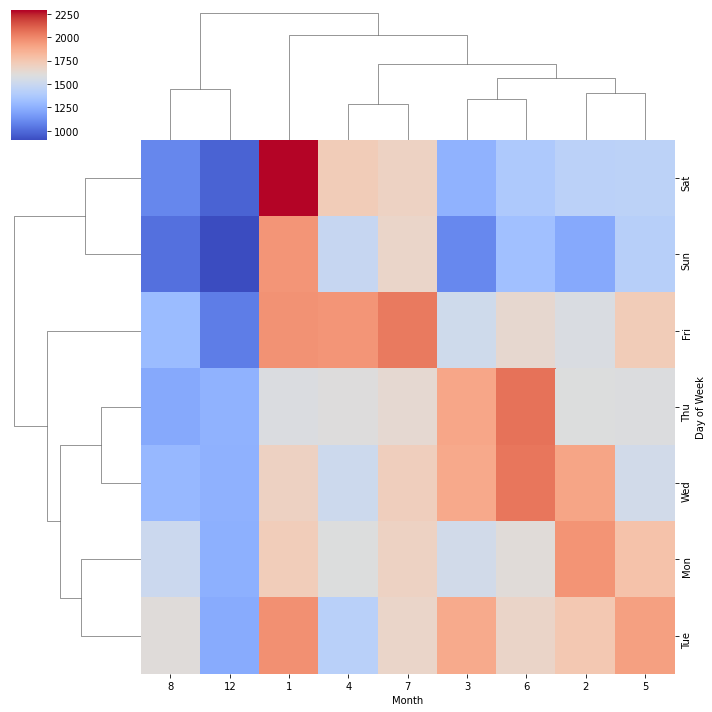

In [47]:
#Creating the clustermap

sns.clustermap(dayMonth, cmap = 'coolwarm')